In [2]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"
%matplotlib widget

In [3]:
import addict
import pickle
import scipy.io as sio
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.cm as cm

from matplotlib.colors import Normalize
from importlib import reload
from rich import print as print

import celeri

plt.rcParams["text.usetex"] = False

In [4]:
def read_run(folder_name):
    """
    Reads and loads data from a specified folder containing a pickled file.

    This function opens a pickled file located in the directory `./../runs/{folder_name}/`,
    where `{folder_name}` is provided as an argument. The pickled file is expected to contain
    a list of six elements, which are extracted and returned as separate variables.

    Parameters:
    folder_name (str): The name of the folder containing the pickled file.

    Returns:
    tuple: A tuple containing the following elements in order:
        - command: command dictionary.
        - estimation: estimation command dictionary.
        - station: station dataframe.
        - segment: segment dataframe.
        - block: block dataframe.
        - meshes: meshes list.

    Example:
    >>> command, estimation, station, segment, block, meshes = read_run('example_folder')
    """
    pickle_file = open(f"{folder_name}/output.pkl", "rb")
    pickle_data = pickle.load(pickle_file)
    command = pickle_data[0]
    estimation = pickle_data[1]
    station = pickle_data[2]
    segment = pickle_data[3]
    block = pickle_data[4]
    meshes = pickle_data[5]
    del pickle_data
    return command, estimation, station, segment, block, meshes


run_folder = celeri.get_newest_run_folder()
command, estimation, station, segment, block, meshes = read_run(run_folder)

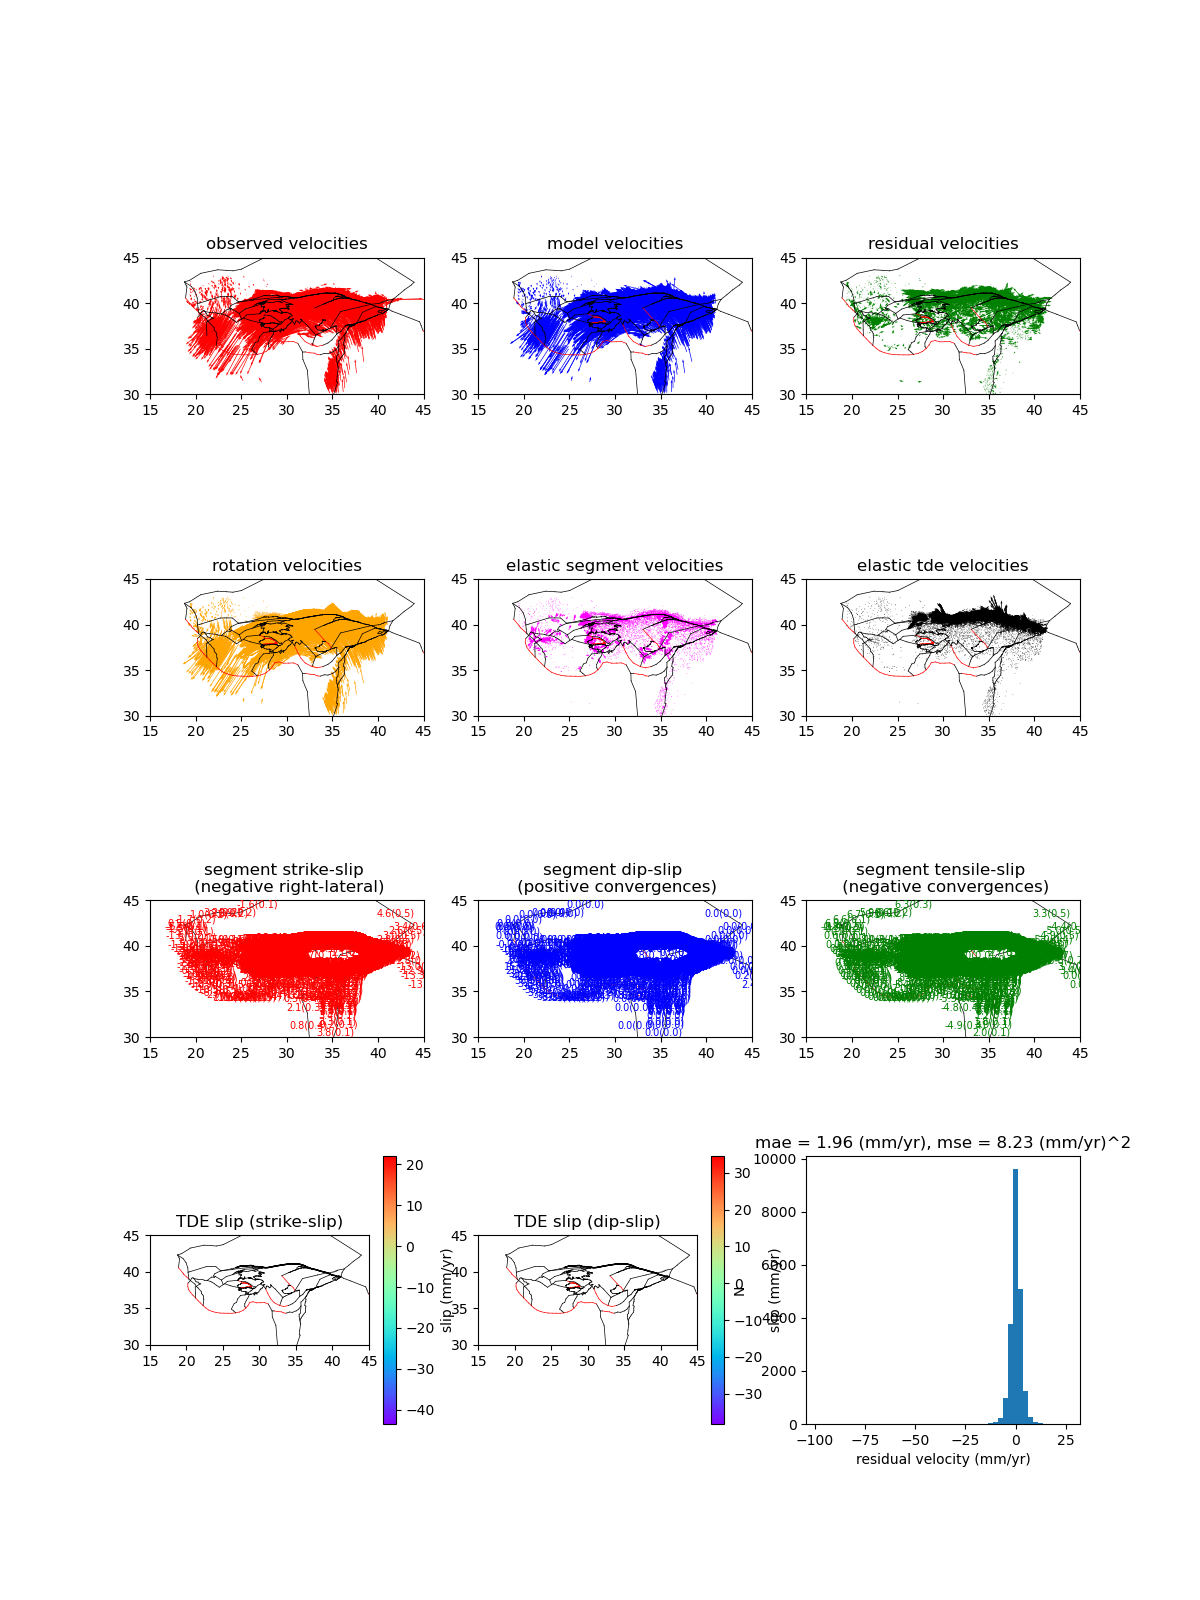

2024-07-11 12:25:41.055 | SUCCESS  | celeri.celeri:plot_estimation_summary:5461 - Wrote figures../runs/0000000006/plot_estimation_summary.(pdf, png)


In [6]:
celeri.plot_estimation_summary(
    command,
    segment,
    station,
    meshes,
    estimation,
    lon_range=command.lon_range,
    lat_range=command.lat_range,
    quiver_scale=command.quiver_scale,
)

In [7]:
# TODO: Tune for Western North America so we can remove Anatolia files
# TODO: Functions for slip rate plotting
# TODO: Function for residual magnitude plotting

In [8]:
def get_default_plotting_dict():
    """
    Creates and returns a default dictionary for plotting parameters.

    This function initializes and returns an `addict.Dict` object populated with default
    plotting parameters. These parameters include settings for world boundaries, figure
    size, font size, longitude and latitude ranges and ticks, slip rate limits, land
    properties, key rectangle and arrow properties, arrow properties, and segment line
    properties.

    Returns:
    addict.Dict: A dictionary containing default plotting parameters.

    The returned dictionary includes the following keys and their default values:
        - WORLD_BOUNDARIES: Data loaded from "WorldHiVectors.mat".
        - FIGSIZE_VECTORS: (10, 4) - Default figure size for vector plots.
        - FONTSIZE: 16 - Default font size.
        - LON_RANGE: (-90, 90) - Default longitude range.
        - LAT_RANGE: (0, 360) - Default latitude range.
        - LON_TICKS: [0, 180, 360] - Default longitude ticks.
        - LAT_TICKS: [-90, 0, 90] - Default latitude ticks.
        - SLIP_RATE_MIN: -25.0 - Minimum slip rate.
        - SLIP_RATE_MAX: 25.0 - Maximum slip rate.
        - LAND_COLOR: "lightgray" - Color of land areas.
        - LAND_LINEWIDTH: 0.5 - Line width for land boundaries.
        - LAND_ZORDER: 0 - Z-order for land boundaries.
        - KEY_RECTANGLE_ANCHOR: [0, -90] - Anchor point for the key rectangle.
        - KEY_RECTANGLE_WIDTH: 3.0 - Width of the key rectangle.
        - KEY_RECTANGLE_HEIGHT: 1.55 - Height of the key rectangle.
        - KEY_ARROW_LON: 5.0 - Longitude for the key arrow.
        - KEY_ARROW_LAT: -85.0 - Latitude for the key arrow.
        - KEY_ARROW_MAGNITUDE: 25.0 - Magnitude for the key arrow.
        - KEY_ARROW_TEXT: "25 mm/yr" - Text for the key arrow.
        - KEY_ARROW_COLOR: "k" - Color for the key arrow.
        - KEY_BACKGROUND_COLOR: "white" - Background color for the key.
        - KEY_LINEWIDTH: 1.0 - Line width for the key.
        - KEY_EDGECOLOR: "k" - Edge color for the key.
        - ARROW_MAGNITUDE_MIN: 0.0 - Minimum arrow magnitude.
        - ARROW_MAGNITUDE_MAX: 25.0 - Maximum arrow magnitude.
        - ARROW_COLORMAP: cm.plasma - Colormap for arrows.
        - ARROW_SCALE: 100 - Scale for arrows.
        - ARROW_WIDTH: 0.0025 - Width for arrows.
        - ARROW_LINEWIDTH: 0.5 - Line width for arrows.
        - ARROW_EDGECOLOR: "k" - Edge color for arrows.
        - SEGMENT_LINE_WIDTH_OUTER: 2.0 - Outer line width for segments.
        - SEGMENT_LINE_WIDTH_INNER: 1.0 - Inner line width for segments.
        - SEGMENT_LINE_COLOR_OUTER: "k" - Outer line color for segments.
        - SEGMENT_LINE_COLOR_INNER: "w" - Inner line color for segments.

    Example:
    >>> p = get_default_plotting_dict()
    """

    p = addict.Dict()
    p.WORLD_BOUNDARIES = sio.loadmat("WorldHiVectors.mat")
    p.FIGSIZE_VECTORS = (10, 4)
    p.FONTSIZE = 16
    p.LON_RANGE = (-90, 90)
    p.LAT_RANGE = (0, 360)
    p.LON_TICKS = [0, 180, 360]
    p.LAT_TICKS = [-90, 0, 90]
    p.SLIP_RATE_MIN = -25.0
    p.SLIP_RATE_MAX = 25.0
    p.LAND_COLOR = "lightgray"
    p.LAND_LINEWIDTH = 0.5
    p.LAND_ZORDER = 0
    p.KEY_RECTANGLE_ANCHOR = [0, -90]
    p.KEY_RECTANGLE_WIDTH = 3.0
    p.KEY_RECTANGLE_HEIGHT = 1.55
    p.KEY_ARROW_LON = 5.0
    p.KEY_ARROW_LAT = 85.0
    p.KEY_ARROW_MAGNITUDE = 25.0
    p.KEY_ARROW_TEXT = "25 mm/yr"
    p.KEY_ARROW_COLOR = "k"
    p.KEY_BACKGROUND_COLOR = "white"
    p.KEY_LINEWIDTH = 1.0
    p.KEY_EDGECOLOR = "k"
    p.ARROW_MAGNITUDE_MIN = 0.0
    p.ARROW_MAGNITUDE_MAX = 25.0
    p.ARROW_COLORMAP = cm.plasma
    p.ARROW_SCALE = 100
    p.ARROW_WIDTH = 0.0025
    p.ARROW_LINEWIDTH = 0.5
    p.ARROW_EDGECOLOR = "k"
    p.SEGMENT_LINE_WIDTH_OUTER = 2.0
    p.SEGMENT_LINE_WIDTH_INNER = 1.0
    p.SEGMENT_LINE_COLOR_OUTER = "k"
    p.SEGMENT_LINE_COLOR_INNER = "w"
    return p


# Get a default plotting parameter dictionary
p = get_default_plotting_dict()

# Modify some core plotting parameters
p.LON_RANGE = (25, 42)
p.LAT_RANGE = (34, 43)
p.LON_TICKS = [25, 27, 29, 31, 33, 35, 37, 39, 41]
p.LAT_TICKS = [34, 36, 38, 40, 42]
p.SLIP_RATE_MIN = -25.0
p.SLIP_RATE_MAX = 25.0
p.ARROW_MAGNITUDE_MIN = 0.0
p.ARROW_MAGNITUDE_MAX = 25.0

print(p.keys())

dict_keys(['WORLD_BOUNDARIES', 'FIGSIZE_VECTORS', 'FONTSIZE', 'LON_RANGE', 'LAT_RANGE', 'LON_TICKS', 'LAT_TICKS', 
'SLIP_RATE_MIN', 'SLIP_RATE_MAX', 'LAND_COLOR', 'LAND_LINEWIDTH', 'LAND_ZORDER', 'KEY_RECTANGLE_ANCHOR', 
'KEY_RECTANGLE_WIDTH', 'KEY_RECTANGLE_HEIGHT', 'KEY_ARROW_LON', 'KEY_ARROW_LAT', 'KEY_ARROW_MAGNITUDE', 
'KEY_ARROW_TEXT', 'KEY_ARROW_COLOR', 'KEY_BACKGROUND_COLOR', 'KEY_LINEWIDTH', 'KEY_EDGECOLOR', 
'ARROW_MAGNITUDE_MIN', 'ARROW_MAGNITUDE_MAX', 'ARROW_COLORMAP', 'ARROW_SCALE', 'ARROW_WIDTH', 'ARROW_LINEWIDTH', 
'ARROW_EDGECOLOR', 'SEGMENT_LINE_WIDTH_OUTER', 'SEGMENT_LINE_WIDTH_INNER', 'SEGMENT_LINE_COLOR_OUTER', 
'SEGMENT_LINE_COLOR_INNER'])

In [9]:
def plot_common_elements(p, segment, lon_range, lat_range):
    """
    Plots common map elements such as segments and axis settings.

    This function plots map segments as lines and sets the longitude and latitude
    ranges and ticks for the plot. It also adjusts the aspect ratio and sets labels
    and tick parameters.

    Parameters:
    segment (DataFrame): A DataFrame containing segment information with columns
                         'lon1', 'lon2', 'lat1', and 'lat2' representing the
                         starting and ending coordinates of each segment.
    lon_range (tuple): A tuple specifying the longitude range as (min_lon, max_lon).
    lat_range (tuple): A tuple specifying the latitude range as (min_lat, max_lat).

    The function performs the following steps:
    1. Plots the outer segment lines in black with a specified line width.
    2. Plots the inner segment lines in white with a specified line width.
    3. Sets the x and y axis limits to the provided longitude and latitude ranges.
    4. Sets the x and y axis ticks to predefined values.
    5. Adjusts the aspect ratio to be equal.
    6. Sets the x and y axis labels and their font sizes.
    7. Sets the tick parameters, including the label size.

    Minimal example:
    >>> segment = pd.DataFrame({
    >>>     'lon1': [10, 20],
    >>>     'lon2': [15, 25],
    >>>     'lat1': [30, 40],
    >>>     'lat2': [35, 45]
    >>> })
    >>> lon_range = (5, 30)
    >>> lat_range = (25, 50)
    >>> plot_common_elements(segment, lon_range, lat_range)
    """
    for i in range(len(segment)):
        plt.plot(
            [segment.lon1[i], segment.lon2[i]],
            [segment.lat1[i], segment.lat2[i]],
            "-k",
            linewidth=p.SEGMENT_LINE_WIDTH_OUTER,
        )
    for i in range(len(segment)):
        plt.plot(
            [segment.lon1[i], segment.lon2[i]],
            [segment.lat1[i], segment.lat2[i]],
            "-w",
            linewidth=p.SEGMENT_LINE_WIDTH_INNER,
        )

    plt.xlim([lon_range[0], lon_range[1]])
    plt.ylim([lat_range[0], lat_range[1]])
    plt.xticks(p.LON_TICKS)
    plt.yticks(p.LAT_TICKS)
    plt.gca().set_aspect("equal", adjustable="box")
    plt.xlabel("longitude (degrees)", fontsize=p.FONTSIZE)
    plt.ylabel("latitude (degrees)", fontsize=p.FONTSIZE)
    plt.tick_params(labelsize=p.FONTSIZE)


def plot_vel_arrows_elements(p, lon, lat, east_velocity, north_velocity, arrow_scale):
    """
    Plots velocity vectors as arrows on a map along with other map elements.

    This function plots velocity vectors given eastward and northward components
    of velocity, scaling the arrows appropriately. It also draws land boundaries,
    a white background rectangle for the key, and an arrow legend.

    Parameters:
    east_velocity (ndarray): Array of eastward velocity components.
    north_velocity (ndarray): Array of northward velocity components.
    arrow_scale (float): Scaling factor for the arrows.

    The function uses global plotting parameters defined in a dictionary `p`,
    which should include keys for arrow properties, land properties, and key
    rectangle and arrow legend properties.

    The function performs the following steps:
    1. Calculates the magnitude of the velocity vectors.
    2. Normalizes the velocity magnitudes for colormap scaling.
    3. Plots the velocity vectors using `plt.quiver`.
    4. Draws land boundaries using `plt.fill`.
    5. Draws a white background rectangle for the key using `mpatches.Rectangle`.
    6. Adds an arrow legend using `plt.quiverkey`.
    7. Sets the aspect ratio of the plot to be equal.
    8. Displays the plot using `plt.show`.

    Minimal example:
    >>> east_velocity = np.array([1.0, 2.0, 3.0])
    >>> north_velocity = np.array([1.0, 2.0, 3.0])
    >>> arrow_scale = 1.0
    >>> plot_vel_arrows_elements(east_velocity, north_velocity, arrow_scale)
    """

    # Draw velocity vectors
    velocity_magnitude = np.sqrt(east_velocity**2.0 + north_velocity**2.0)
    norm = Normalize()
    norm.autoscale(velocity_magnitude)
    norm.vmin = p.ARROW_MAGNITUDE_MIN
    norm.vmax = p.ARROW_MAGNITUDE_MAX
    colormap = p.ARROW_COLORMAP
    quiver_handle = plt.quiver(
        lon,
        lat,
        east_velocity,
        north_velocity,
        scale=p.ARROW_SCALE * arrow_scale,
        width=p.ARROW_WIDTH,
        scale_units="inches",
        color=colormap(norm(velocity_magnitude)),
        linewidth=p.ARROW_LINEWIDTH,
        edgecolor=p.ARROW_EDGECOLOR,
    )

    # Draw land
    plt.fill(
        p.WORLD_BOUNDARIES["lon"],
        p.WORLD_BOUNDARIES["lat"],
        color=p.LAND_COLOR,
        linewidth=p.LAND_LINEWIDTH,
        zorder=p.LAND_ZORDER,
    )

    # Draw white background rectangle
    rect = mpatches.Rectangle(
        p.KEY_RECTANGLE_ANCHOR,
        p.KEY_RECTANGLE_WIDTH,
        p.KEY_RECTANGLE_HEIGHT,
        fill=True,
        color=p.KEY_BACKGROUND_COLOR,
        linewidth=p.KEY_LINEWIDTH,
        ec=p.KEY_EDGECOLOR,
    )
    plt.gca().add_patch(rect)

    # Draw arrow legend
    plt.quiverkey(
        quiver_handle,
        p.KEY_ARROW_LON,
        p.KEY_ARROW_LAT,
        p.KEY_ARROW_MAGNITUDE,
        p.KEY_ARROW_TEXT,
        coordinates="data",
        color=p.KEY_ARROW_COLOR,
        fontproperties={"size": p.FONTSIZE},
    )

    plt.gca().set_aspect("equal")
    plt.show()

In [10]:
def plot_vels(
    p, segment, lon, lat, east_vel, north_vel, arrow_scale, title_string="velocities"
):
    """
    Plots a map of velocity vectors with common map elements.

    This function creates a plot with a specified title, plotting segments and
    velocity vectors on a map. The plot includes common map elements such as
    axis settings and segment lines.

    Parameters:
    title_string (str): The title of the plot.
    p (addict.Dict): A dictionary containing plotting parameters.
    segment (DataFrame): A DataFrame containing segment information with columns
                         'lon1', 'lon2', 'lat1', and 'lat2' representing the
                         starting and ending coordinates of each segment.
    east_vel (ndarray): Array of eastward velocity components.
    north_vel (ndarray): Array of northward velocity components.

    The function performs the following steps:
    1. Creates a figure with a specified size.
    2. Sets the plot title with the specified font size.
    3. Plots common map elements including segment lines and axis settings.
    4. Plots velocity vectors as arrows with scaling and color mapping.

    Minimal example:
    >>> p = get_default_plotting_dict()
    >>> segment = pd.DataFrame({
    >>>     'lon1': [10, 20],
    >>>     'lon2': [15, 25],
    >>>     'lat1': [30, 40],
    >>>     'lat2': [35, 45]
    >>> })
    >>> east_vel = np.array([1.0, 2.0])
    >>> north_vel = np.array([1.0, 2.0])
    >>> title_string = "Velocity Vectors"
    >>> plot_vels(title_string, p, segment, east_vel, north_vel)
    """
    plt.figure(figsize=p.FIGSIZE_VECTORS)
    plt.title(title_string, fontsize=p.FONTSIZE)
    plot_common_elements(p, segment, p.LON_RANGE, p.LAT_RANGE)
    plot_vel_arrows_elements(p, lon, lat, east_vel, north_vel, arrow_scale=arrow_scale)

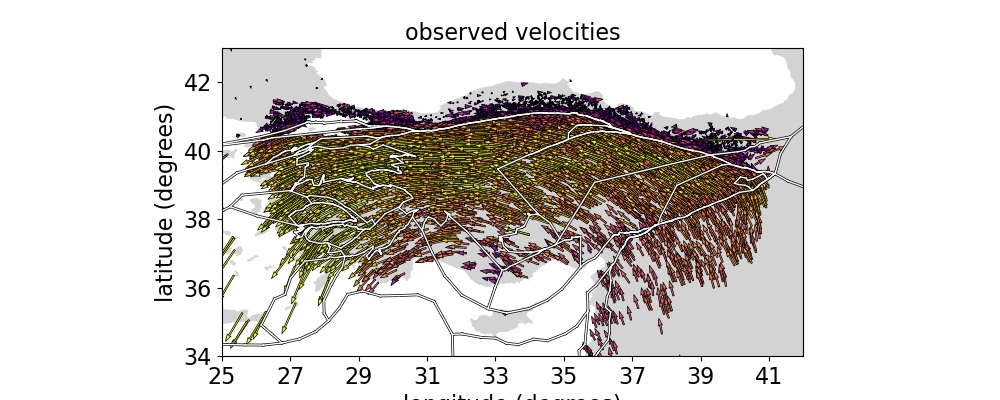

In [11]:
plot_vels(
    p,
    segment,
    station.lon,
    station.lat,
    station.east_vel,
    station.north_vel,
    arrow_scale=1.0,
    title_string="observed velocities",
)

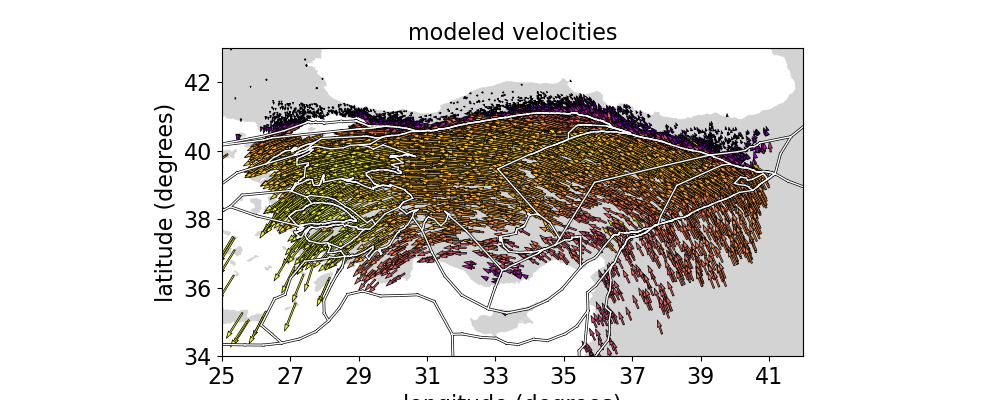

In [12]:
plot_vels(
    p,
    segment,
    station.lon,
    station.lat,
    estimation.east_vel,
    estimation.north_vel,
    arrow_scale=1.0,
    title_string="modeled velocities",
)

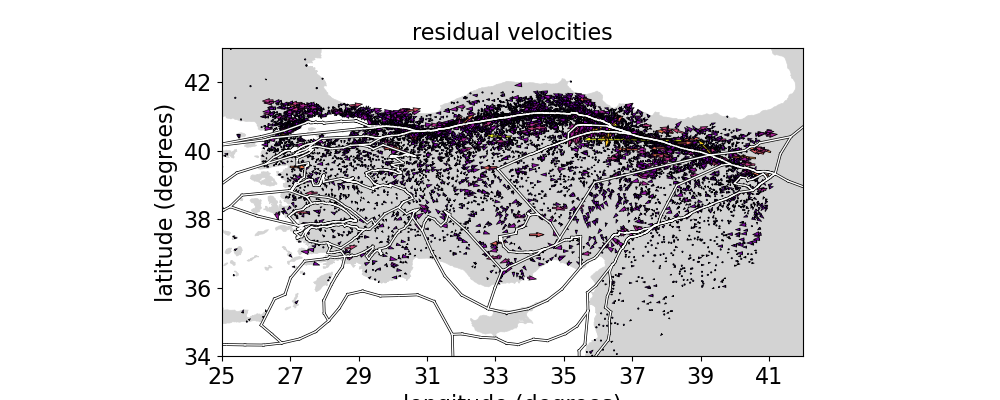

In [13]:
plot_vels(
    p,
    segment,
    station.lon,
    station.lat,
    estimation.east_vel_residual,
    estimation.north_vel_residual,
    arrow_scale=1.0,
    title_string="residual velocities",
)

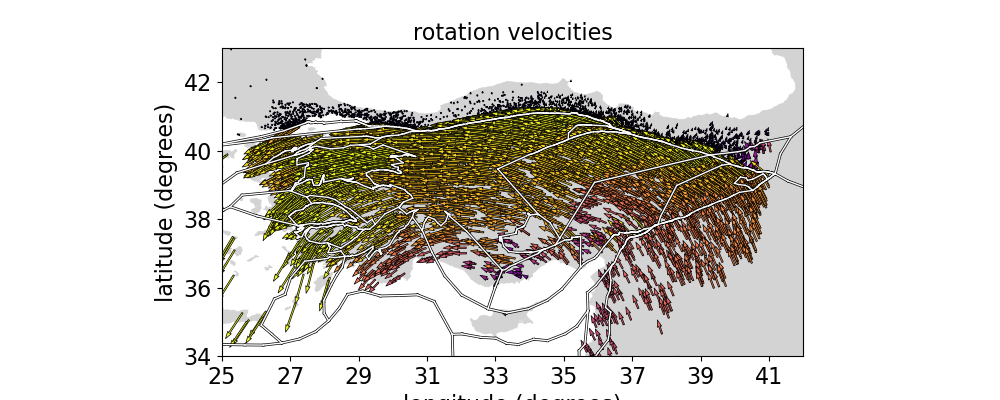

In [15]:
plot_vels(
    p,
    segment,
    station.lon,
    station.lat,
    estimation.east_vel_rotation,
    estimation.north_vel_rotation,
    arrow_scale=1.0,
    title_string="rotation velocities",
)

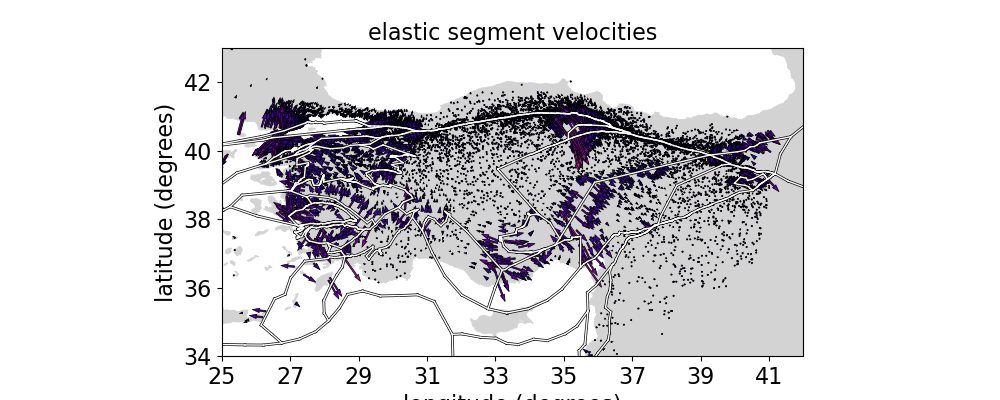

In [17]:
plot_vels(
    p,
    segment,
    station.lon,
    station.lat,
    estimation.east_vel_elastic_segment,
    estimation.north_vel_elastic_segment,
    arrow_scale=0.25,
    title_string="elastic segment velocities",
)

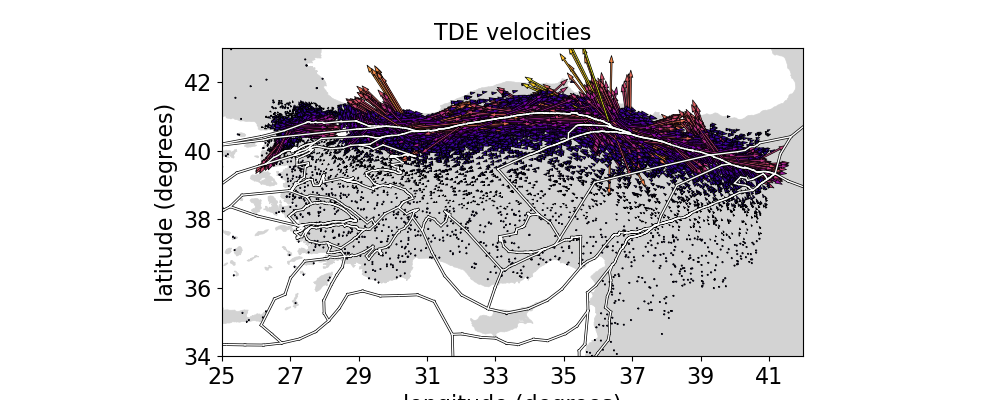

In [18]:
plot_vels(
    p,
    segment,
    station.lon,
    station.lat,
    estimation.east_vel_tde,
    estimation.north_vel_tde,
    arrow_scale=0.25,
    title_string="TDE velocities",
)

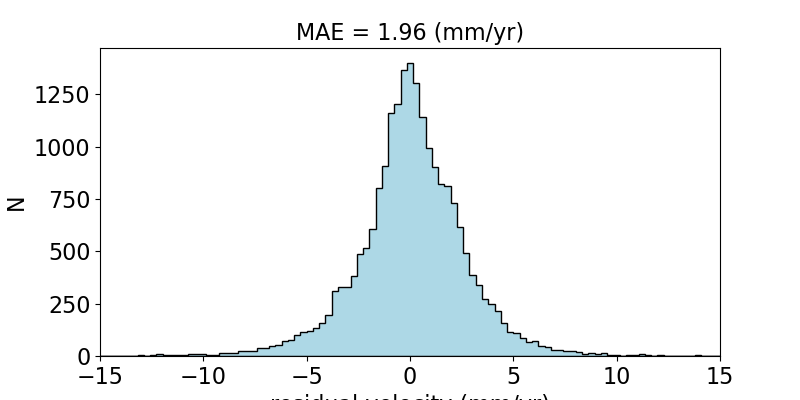

In [19]:
# Residual velocities
residual_velocity_vector = np.concatenate(
    (estimation.east_vel_residual.values, estimation.north_vel_residual.values)
)
mean_average_error = np.mean(np.abs(residual_velocity_vector))

N_BINS = 100
BIN_EDGE_MIN = -15
BIN_EDGE_MAX = 15
BINS = np.linspace(BIN_EDGE_MIN, BIN_EDGE_MAX, N_BINS)

# Create histogram of residual velocities
plt.figure(figsize=(8, 4))
plt.hist(
    residual_velocity_vector,
    BINS,
    histtype="stepfilled",
    color="lightblue",
    edgecolor="k",
)
plt.xlim([BIN_EDGE_MIN, BIN_EDGE_MAX])
plt.xlabel("residual velocity (mm/yr)", fontsize=p.FONTSIZE)
plt.ylabel("N", fontsize=p.FONTSIZE)
plt.title(f"MAE = {mean_average_error:.2f} (mm/yr)", fontsize=p.FONTSIZE)
plt.tick_params(labelsize=p.FONTSIZE)
plt.show()

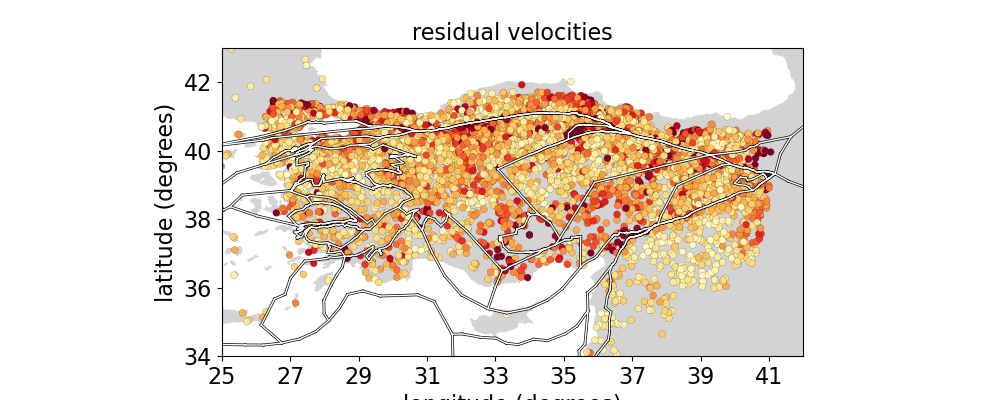

In [23]:
# Scatter plot for velocity estimate errors
mae_station = np.abs(estimation.east_vel_residual.values) + np.abs(
    estimation.north_vel_residual.values
)
fig = plt.figure(figsize=p.FIGSIZE_VECTORS)
plt.title("residual velocities", fontsize=16)
plt.fill(
    p.WORLD_BOUNDARIES["lon"],
    p.WORLD_BOUNDARIES["lat"],
    color=p.LAND_COLOR,
    linewidth=p.LAND_LINEWIDTH,
    zorder=p.LAND_ZORDER,
)

plt.scatter(
    station.lon,
    station.lat,
    s=25,
    edgecolors="k",
    c=mae_station,
    cmap="YlOrRd",
    linewidths=0.1,
)
plot_common_elements(p, segment, p.LON_RANGE, p.LAT_RANGE)
plt.clim(0, 10)

# Draw white background rectangle
# rect = mpatches.Rectangle(
#     p.KEY_RECTANGLE_ANCHOR,
#     p.KEY_RECTANGLE_WIDTH,
#     p.KEY_RECTANGLE_HEIGHT,
#     fill=True,
#     color=p.KEY_BACKGROUND_COLOR,
#     linewidth=p.KEY_LINEWIDTH,
#     ec=p.KEY_EDGECOLOR,
# )
# plt.gca().add_patch(rect)
plt.show()

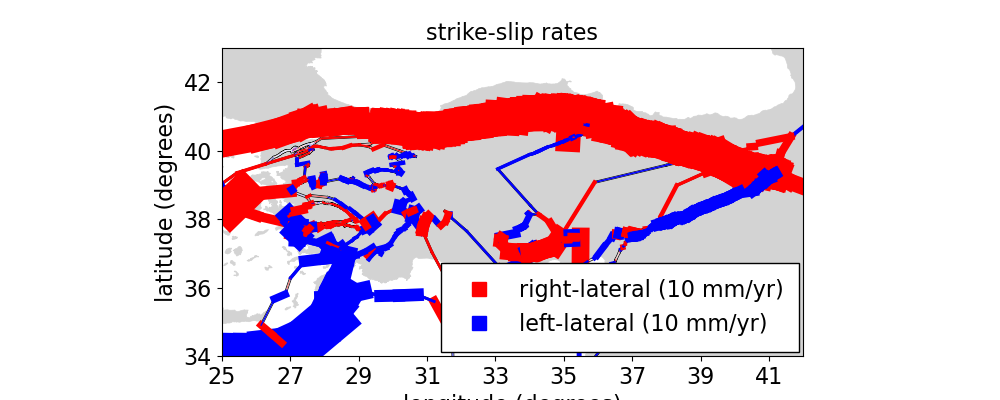

In [24]:
# Plot estimated strike-slip rates
plt.figure(figsize=p.FIGSIZE_VECTORS)
plt.title("strike-slip rates", fontsize=p.FONTSIZE)
plot_common_elements(p, segment, p.LON_RANGE, p.LAT_RANGE)

plt.fill(
    p.WORLD_BOUNDARIES["lon"],
    p.WORLD_BOUNDARIES["lat"],
    color=p.LAND_COLOR,
    linewidth=p.LAND_LINEWIDTH,
    zorder=p.LAND_ZORDER,
)

for i in range(len(segment)):
    if estimation.strike_slip_rates[i] < 0:
        plt.plot(
            [segment.lon1[i], segment.lon2[i]],
            [segment.lat1[i], segment.lat2[i]],
            "-r",
            linewidth=estimation.strike_slip_rates[i],
        )
    else:
        plt.plot(
            [segment.lon1[i], segment.lon2[i]],
            [segment.lat1[i], segment.lat2[i]],
            "-b",
            linewidth=estimation.strike_slip_rates[i],
        )

# Legend
black_segments = mlines.Line2D(
    [],
    [],
    color="red",
    marker="s",
    linestyle="None",
    markersize=10,
    label="right-lateral (10 mm/yr)",
)
red_segments = mlines.Line2D(
    [],
    [],
    color="blue",
    marker="s",
    linestyle="None",
    markersize=10,
    label="left-lateral (10 mm/yr)",
)
plt.legend(
    handles=[black_segments, red_segments],
    loc="lower right",
    fontsize=p.FONTSIZE,
    framealpha=1.0,
    edgecolor="k",
).get_frame().set_boxstyle("Square")

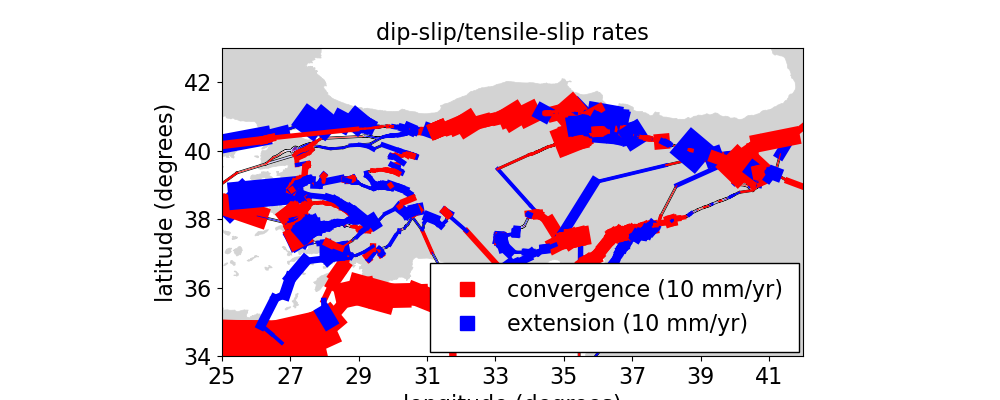

In [26]:
# Plot estimated strike-slip rates
plt.figure(figsize=p.FIGSIZE_VECTORS)
plt.title("dip-slip/tensile-slip rates", fontsize=p.FONTSIZE)
plot_common_elements(p, segment, p.LON_RANGE, p.LAT_RANGE)

plt.fill(
    p.WORLD_BOUNDARIES["lon"],
    p.WORLD_BOUNDARIES["lat"],
    color=p.LAND_COLOR,
    linewidth=p.LAND_LINEWIDTH,
    zorder=p.LAND_ZORDER,
)

for i in range(len(segment)):
    if estimation.dip_slip_rates[i] > 0:
        plt.plot(
            [segment.lon1[i], segment.lon2[i]],
            [segment.lat1[i], segment.lat2[i]],
            "-r",
            linewidth=estimation.dip_slip_rates[i],
        )
    else:
        plt.plot(
            [segment.lon1[i], segment.lon2[i]],
            [segment.lat1[i], segment.lat2[i]],
            "-b",
            linewidth=estimation.dip_slip_rates[i],
        )

for i in range(len(segment)):
    if estimation.tensile_slip_rates[i] < 0:
        plt.plot(
            [segment.lon1[i], segment.lon2[i]],
            [segment.lat1[i], segment.lat2[i]],
            "-r",
            linewidth=estimation.tensile_slip_rates[i],
        )
    else:
        plt.plot(
            [segment.lon1[i], segment.lon2[i]],
            [segment.lat1[i], segment.lat2[i]],
            "-b",
            linewidth=estimation.tensile_slip_rates[i],
        )


# Legend
black_segments = mlines.Line2D(
    [],
    [],
    color="red",
    marker="s",
    linestyle="None",
    markersize=10,
    label="convergence (10 mm/yr)",
)
red_segments = mlines.Line2D(
    [],
    [],
    color="blue",
    marker="s",
    linestyle="None",
    markersize=10,
    label="extension (10 mm/yr)",
)
plt.legend(
    handles=[black_segments, red_segments],
    loc="lower right",
    fontsize=p.FONTSIZE,
    framealpha=1.0,
    edgecolor="k",
).get_frame().set_boxstyle("Square")